# Tip amounts of taxi trips

In [1]:
import setup

In [2]:
def districts_tips(month):
    return month.loc[(month['payment_type'] == 1) & (month['passenger_count'] > 0)][['PULocationID', 'tip_amount']]
    

def divide_by_districts(month):
    return [month.loc[month.PULocationID.isin(setup.districts[key])]['tip_amount'].mean() for key in setup.districts.keys()]


def get_trip_tips(month):
    return month.loc[(month['payment_type'] == 1) & (month['passenger_count'] > 0)][['tip_amount','trip_distance']].astype(float)


def tip_amounts(month):
    return [
        month['tip_amount'].mean(),
        month.loc[month['trip_distance'] <= month['trip_distance'].mean()]['tip_amount'].mean(),
        month.loc[month['trip_distance'] >= month['trip_distance'].mean()]['tip_amount'].mean()
    ]


def tip_amount_average(tip_amounts_year):
    return [sum(month[tip_index] for month in tip_amounts_year) / 12 for tip_index in range(3)]


def result(tip_amounts_year):
    for monthly_index, month_label in enumerate(setup.month_labels):
        print(f'---------- {month_label} ----------')
        for tip_index, tip_label in enumerate(setup.tip_labels):
            print(f'{tip_label} = {tip_amounts_year[monthly_index][tip_index]}')

        print('')

# NYC districts
#### Tip amount for each district in NYC

-------------------- year average --------------------
[1.6038570202836313, 2.6238329569011998, 2.358494313717896, 7.5715961566009184, 3.240462558300724] 


-------------------- January --------------------
[2.5121423682409305, 2.7527315212207917, 2.2735572109207083, 7.578271506997987, 4.432170542635659] 

-------------------- February --------------------
[2.2611340593315807, 2.738966824332119, 2.2794012934220076, 7.498244968679196, 4.656944444444445] 

-------------------- March --------------------
[1.7615554115359688, 2.6858021272021344, 2.3280739252779608, 7.608668013397801, 3.162517985611511] 

-------------------- April --------------------
[1.53953119232189, 2.697438753362879, 2.349080499224844, 7.622319213867188, 5.814782608695652] 

-------------------- May --------------------
[1.5511848494658467, 2.6833074695714307, 2.4088860588235423, 7.663729112974458, 3.2181920903954797] 

-------------------- June --------------------
[1.4727145085803433, 2.688559992962702, 2.3888012055

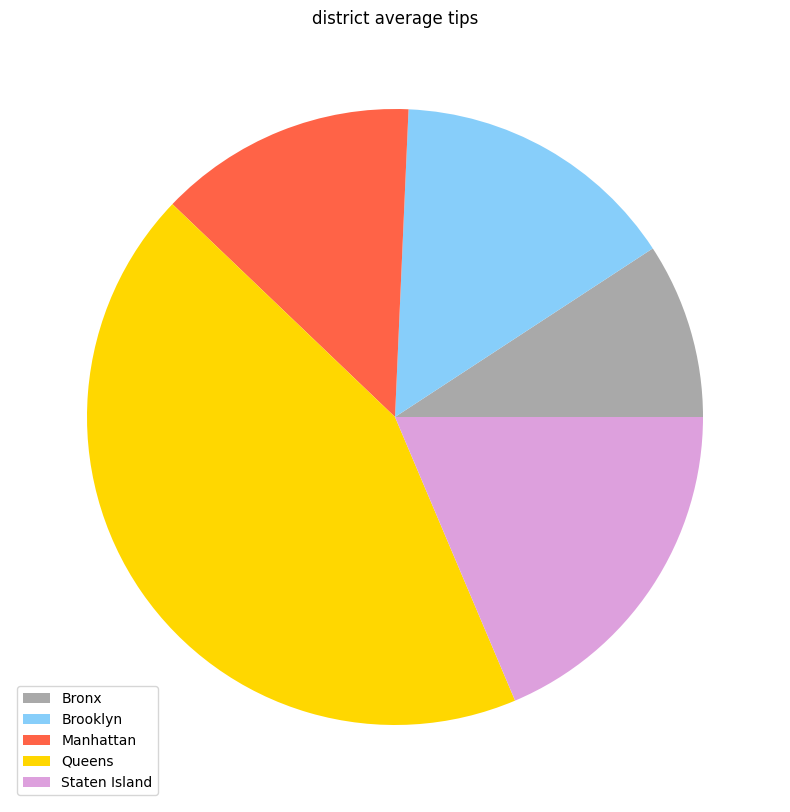

In [3]:
both_year_from_manhattan = [districts_tips(month) for month in setup.year]
tips_year_from_manhattan = [divide_by_districts(month) for month in both_year_from_manhattan]
average_tips = [sum(tips) / 12 for tips in zip(*tips_year_from_manhattan)]

print('-------------------- year average --------------------')
print(average_tips, '\n\n')
for index in range(12):
    print('--------------------', setup.month_labels[index], '--------------------')
    print(tips_year_from_manhattan[index], '\n')
    
fig = setup.plt.figure(figsize =(10, 10))
setup.plt.title('district average tips')
setup.plt.pie(average_tips, colors=setup.district_colors)
setup.plt.legend(setup.district_labels,loc=3)
setup.plt.show()

# Tip amounts
#### Tip amounts based on trip distance

In [4]:
splitted_trips = [get_trip_tips(month) for month in setup.year]
tip_amounts_year = [tip_amounts(month) for month in splitted_trips]
tip_amounts_average = tip_amount_average(tip_amounts_year)

print('---------- year average ----------')
for label, average in zip(setup.tip_labels[:3], tip_amounts_average[:3]):
    print(f'{label} = {average}')

print('')
result(tip_amounts_year)

---------- year average ----------
average = 2.7005572059002176
lower = 1.848472595761123
upper = 5.14653577358896

---------- January ----------
average = 2.6098443962005753
lower = 1.7878413510214877
upper = 5.011832653890032

---------- February ----------
average = 2.5920163077998515
lower = 1.7751505331839028
upper = 4.937995083920137

---------- March ----------
average = 2.6563963239125994
lower = 1.8030523382488601
upper = 5.115965451279914

---------- April ----------
average = 2.703023595872299
lower = 1.832383325151088
upper = 5.180304325246146

---------- May ----------
average = 2.7682385090777806
lower = 1.8750025815490254
upper = 5.307220855490546

---------- June ----------
average = 2.7449218511420628
lower = 1.8617161519225758
upper = 5.242039050449568

---------- July ----------
average = 2.690461097324169
lower = 1.844806557301549
upper = 5.107856187312985

---------- August ----------
average = 2.6783233227660825
lower = 1.837241936080326
upper = 5.086901538677267
